<h1>
<br>Data Science 3250 Project - August 2019
<br>Team # 1
</h1>


![title](http://www.symboticware.com/wp-content/uploads/2016/03/toronto-skyline-banner.jpg)


<h1>Introduction</h1>

<font size="3" color="blue">Egypt based <a href ="http://orascom.com/">Orascom Holdings</a> is one of the largest investment firms in the Middle East. After sucessfully launching Freedom Mobile as Canada's 4th largest mobile operator, Orasom's interest in Canada increased. Accordingly its <a href ="http://orascomhm.com/">Hotel Management Division</a> joined forces with Dubai Based Ikama Real Estate in order to estabish UberHotels with an ambitious strategy to take market share from Airbnb.<br><br>UberHotels has a novel strategy of buying or leasing units in strategic areas in Toronto and marketing them at competitive rates to Airbnb. UberHotels aims at offering high value short term rentals for competitive rates and it also has a mobile 'room service' team that gives the company a solid competitive edge over Airbnb.<br><br>UberHotel has already secured funding from Orascom and is in the early stages of conducting feasibility studies to assess the viability of the project. Accordingly, it contacted DS3250 Consulting in order to assist them in understanding the investment landscape in Toronto. <br><br>Based on the outcome this study UberHotels intends to invest $153 million in phase 1.
<br><br></font>

<font size="3" color="red">DS3250 Consulting has accepted the assignment and the following is the agreed upon deliverables:
<br>A) Insights about the consumer behaviour and industry trends.
<br>B) Data driven Pricing Guidelines Manual that would be used as an objective tool for sales decisions.
<br>C) Heat map for Airbnb listings.
</font>

<h1>Imports & Settings</h1>

In [80]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
import seaborn as sns

from collections import Counter 
import nltk 
from nltk.corpus import stopwords
stopword = stopwords.words('english')

from wordcloud import WordCloud

sns.set(style="ticks", color_codes=True)
warnings.filterwarnings("ignore")
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Jupyter Cell Options (Cell -> All Output -> Toggle Scrolling) This makes Jupyter expand cell height to whatever the output is
#raise command is very useful in stopping the run (for test purposes)

# Analysis of Listing.csv

<h1>Defs</h1>

In [99]:

def prcnt(a,b,sign='$'):
    x = int(round(a/b*100,0))
    if sign !='': x = str(x)+'%'
    return x

def info(df, sort = True):
    #counts nan in each coumn
    df_nan, i = pd.DataFrame(columns=['Column', 'NaN Count', 'Nan%','Unique']), 0
    cols = list(df)
    for col in cols:
        i+=1
        nan_count = df[col].isnull().sum()
        #percent = int(round(nan_count/df.shape[0]*100,0))
        percent = prcnt(nan_count,df.shape[0],'')
        unique = len(df[col].unique())
        df_nan.loc[i]=[col,nan_count,percent,unique]
        
    if sort: df_nan= df_nan.sort_values(['Nan%'], ascending = False)
    df_nan['Nan%']=df_nan['Nan%'].astype(str).apply(lambda x: str(x)+'%')
    print('\n')
    shape(df)
    return df_nan


def shape(df):
    #returns number of rows and columns in df
    print('Rows:',df.shape[0],'Columns:',df.shape[1])
    
    
def println(text, extra = 2, char='='):
    #puts a line under the text
    text = str(text) 
    text = text+'\n'+(len(text)+extra)*char
    print (text)
            
            
def top(df,cols=[],count=10):
    #list the top 10 items by count in the given columns
    if cols == []: cols= list(df)
    for col in cols:
        temp = df[col].value_counts().head(count)
        println('Top 10 (by count) in ['+col+']:')
        print(temp)
        temp.plot('bar', color ='blue')
        plt.show()
       
        
def create_pivot(df, cols, comments):
    #create pivot table
    pd.pivot_table(df,index=cols,values=['Id'],columns=["Price"],aggfunc='count',fill_value=0,margins=True)
    
    
def unique(df,cols=[],count=100):    
    #shows the unique values in every column where the unique values are less than 100
    if cols == []: cols= list(df)
    println('The unique values in every column where the unique values are less than '+str(count)+':')
    x=0
    for col in cols:
        #shows the unique values in every column where the unique items are less than 100 
        unique = list(df[col].unique())
        if len(unique)<count: x=x+1; print('\n'+ str(x)+'] '+col+' (' + str(len(unique)) + ' unique values)\n'+str(unique))
    print ('\n'+str(x)+' out of '+ str(df.shape[1]) + ' columns have less than '+ str(count) +' unique values.')        

    
def hist(df):
    #assumes 1 column only
    df.iloc[:,0].value_counts().to_frame().sort_index(ascending =True) #.iloc[:-1,]
    x = tuple(df.iloc[:,0])
    y = df.index
    plt.bar(y,x,align='center', color ='blue')
    plt.show()
    
    
def pie_chart(df):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    df.iloc[:,0].value_counts().to_frame().sort_index(ascending =True) #.iloc[:-1,]
    labels = df.index
    sizes = tuple(df.iloc[:,0])
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    

def analyze(df, col, QuestionAnswer):
    #prints a summary table of unique items, their count, as well as chart it
    q = QuestionAnswer[0]
    a = QuestionAnswer[1]
    println('\n\n\n'+q)
    df = df0[col].value_counts().to_frame().sort_index(ascending =True).iloc[:]
    total = df[df.columns[0]].sum()
    df['% of Total'] = df[df.columns[0]] #create duplicate col 
    df['% of Total'] = df['% of Total'].apply(lambda x: str(int(round(x*100/total,0)))+'%')
    hist(df)
    pie_chart(df)
    display(df)
    print(a)

#super_hosts(df0,'host_response_rate','min')    
def super_hosts(df,col,function, msg=''):
    #compares super vs. regular host on a given criteria
    df = df0
    cols = ['bedrooms','city'] 
    try:
        df['host_response_rate']=df['host_response_rate'].apply(lambda x: float(x.strip('%'))/100) #convert to numeric
    except:
        pass
    
    df = pd.pivot_table(df,index=cols,values=[col],columns=["host_is_superhost"],aggfunc=function,fill_value=0,margins=True)
    df = pd.DataFrame(df.to_records())
    df.columns = ['bedrooms','city','regular','super','all']
    df = df.drop(df[df.regular * df.super ==0].index) #remove any rows with zero values to make the comparison correct
    t = df.query('super>regular').count()[0]
    print('In ' + prcnt(t,df.shape[0]) + ' of the categories, super hosts ' + function + ' ' + col +' is more than regular hosts.' + msg)
    display(df)
    
# Clean a string to remove all the bad characters    
def clean_string(word):
    word = word.strip()
    word = word.replace(".","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    word = word.replace("\n","")
    word = word.replace("\t","")
    word = word.replace("\t","")
    word = word.replace("\r","")
    word = word.replace("-","")
    word = word.replace("&"," ")
    word = word.replace("@","")
    return word

#generating wordcloud for a given text
def show_wordcloud(data,stopword, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopword,
        max_words=500,
        max_font_size=20, 
        scale=2,
        random_state=131,
        colormap = 'hsv'
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


<h1>Extract, Load, and Transform (ELT) Data</h1>

<h3 style="color:blue;">Read data</h3>

In [6]:
#Data source: http://insideairbnb.com/get-the-data.html
df_original = pd.read_csv('listings.csv')
shape(df_original)

Rows: 20769 Columns: 106


<h3 style="color:blue;">Get a general idea about the data schema</h3>

In [7]:
df_original.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20190604202502,2019-06-05,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.15


<h3 style="color:blue;">Too many columns: transpose a row for easier inspection</h3>

In [8]:
#too many columns - let's inspect one entry
df_original.head(1).transpose()[0:50] #first 50 columns

,0
id,1419
listing_url,https://www.airbnb.com/rooms/1419
scrape_id,20190604202502
last_scraped,2019-06-05
name,Beautiful home in amazing area!
summary,"This large, family home is located in one of T..."
space,Visit Toronto with this fabulous furnished hom...
description,"This large, family home is located in one of T..."
experiences_offered,none
neighborhood_overview,The apartment is located in the Ossington stri...


In [9]:
df_original.head(1).transpose()[50:] #The rest of the columns

,0
is_location_exact,f
property_type,House
room_type,Entire home/apt
accommodates,10
bathrooms,3
bedrooms,5
beds,7
bed_type,Real Bed
amenities,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""..."
square_feet,1400


<h3 style="color:blue;">Pick columns of interest</h3>

In [10]:
#Now that we've inspected the columns, let's pick the relevant ones:
columns = ['id', 'host_id', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_identity_verified', 'host_has_profile_pic','host_listings_count', 'guests_included', 'host_total_listings_count','is_location_exact', 'requires_license', 'instant_bookable','require_guest_profile_picture', 'require_guest_phone_verification','neighbourhood_cleansed', 'city', 'zipcode', 'smart_location', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy']
df = df_original[columns]
#df= df.set_index('id')
df.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True) #rename neighbourhood_cleansed to neighbourhood
df.head(1).transpose()

,0
id,1419
host_id,1565
host_since,2008-08-08
host_location,"Toronto, Ontario, Canada"
host_response_time,NaN
host_response_rate,NaN
host_is_superhost,f
host_neighbourhood,Commercial Drive
host_identity_verified,t
host_has_profile_pic,t


In [11]:
#convert host_since to year instead of date
df['host_since']= df['host_since'].apply(lambda x: str(x)[0:4])

<h3 style="color:blue;">Inspect unique values in columns to check that they are valid and see if columns could be classied into bins</h3>

In [12]:
#let's inspect uinque values
unique(df)

The unique values in every column where the unique values are less than 100:

1] host_since (13 unique values)
['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'nan', '2016', '2017', '2019', '2018']

2] host_response_time (5 unique values)
[nan, 'a few days or more', 'within an hour', 'within a few hours', 'within a day']

3] host_response_rate (66 unique values)
[nan, '0%', '100%', '79%', '90%', '70%', '87%', '33%', '50%', '65%', '80%', '86%', '78%', '94%', '75%', '95%', '83%', '92%', '98%', '93%', '25%', '96%', '67%', '72%', '85%', '82%', '38%', '60%', '73%', '64%', '97%', '99%', '40%', '71%', '88%', '44%', '14%', '30%', '77%', '57%', '58%', '63%', '20%', '89%', '22%', '68%', '55%', '91%', '26%', '43%', '81%', '48%', '84%', '10%', '29%', '56%', '69%', '62%', '74%', '61%', '17%', '47%', '31%', '54%', '59%', '42%']

4] host_is_superhost (3 unique values)
['f', 't', nan]

5] host_identity_verified (3 unique values)
['t', 'f', nan]

6] host_has_profile_pic (3 unique value

<h3 style="color:blue;">Delete NaN</h3>

In [13]:
info(df)



Rows: 20769 Columns: 42


,Column,NaN Count,Nan%,Unique
33,square_feet,20613,99%,50
36,monthly_price,18991,91%,496
35,weekly_price,18682,90%,444
5,host_response_time,4984,24%,5
6,host_response_rate,4984,24%,66
37,security_deposit,4902,24%,264
41,review_scores_rating,4272,21%,50
38,cleaning_fee,3384,16%,222
8,host_neighbourhood,2520,12%,185
21,zipcode,365,2%,6926


In [14]:
df = df.drop(['square_feet','monthly_price','weekly_price'], axis =1)  #most of those cols is nan
df = df.dropna() 

<h3 style="color:blue;">Take another look for further transformations</h3>

In [15]:
#let's see the cleaned df
df.head(1).transpose()

,3
id,23691
host_id,93825
host_since,2010
host_location,"Toronto, Ontario, Canada"
host_response_time,within an hour
host_response_rate,100%
host_is_superhost,t
host_neighbourhood,Fairbank
host_identity_verified,t
host_has_profile_pic,t


<h3 style="color:blue;">Delete similar columns</h3>

In [16]:
unique(df,['city','smart_location', 'host_location','host_neighbourhood'],10000)

The unique values in every column where the unique values are less than 10000:

1] city (18 unique values)
['Toronto', 'Etobicoke', 'North York, Toronto', '토론토', 'toronto', 'Scarborough', 'Etobicoke ', 'Vaughan', 'North york', 'Toronto, Ontario, CA', 'Toronto ', 'SCARBOROUGH', 'York', 'North York', 'ONTARIO ', 'Vaughan ', 'North york - Toronto ', 'Scarborough , Toronto  ']

2] smart_location (18 unique values)
['Toronto, Canada', 'Etobicoke, Canada', 'North York, Toronto, Canada', '토론토, Canada', 'toronto, Canada', 'Scarborough, Canada', 'Etobicoke , Canada', 'Vaughan, Canada', 'North york, Canada', 'Toronto, Ontario, CA, Canada', 'Toronto , Canada', 'SCARBOROUGH, Canada', 'York, Canada', 'North York, Canada', 'ONTARIO , Canada', 'Vaughan , Canada', 'North york - Toronto , Canada', 'Scarborough , Toronto  , Canada']

3] host_location (147 unique values)
['Toronto, Ontario, Canada', 'Andorra', 'New York, New York, United States', 'CA', 'Sydney, New South Wales, Australia', 'Boston, Massa

In [17]:
#host_location has locations that don't make sense such as India, UK, etc. - delete
#host_neighbourhood is the same as neighbourhood - delete
#smart_location is same as city - delete
df = df.drop(['host_location','host_neighbourhood','smart_location'], axis =1) 

<h3 style="color:blue;">Fix inconsistencies in the 'city' column</h3>

In [18]:
unique(df,['city'],10000)

The unique values in every column where the unique values are less than 10000:

1] city (18 unique values)
['Toronto', 'Etobicoke', 'North York, Toronto', '토론토', 'toronto', 'Scarborough', 'Etobicoke ', 'Vaughan', 'North york', 'Toronto, Ontario, CA', 'Toronto ', 'SCARBOROUGH', 'York', 'North York', 'ONTARIO ', 'Vaughan ', 'North york - Toronto ', 'Scarborough , Toronto  ']

1 out of 36 columns have less than 10000 unique values.


In [19]:
#raise
def fix_city(city):
    temp = city
    if 'Toronto'.title() in city.title() and len(city.strip())> len('Toronto'): city = city.replace('Toronto','') #e.g Vaughn, Toronto
    city = city.replace('토론토','Toronto').replace(', CA','').replace(',','').replace('Ontario','Toronto').replace('-','').title().strip()
    if city == '': 
        print('Empty:'+temp)
        #raise
    return city
df['city']=df['city'].apply(lambda city: fix_city(city))
unique(df,['city'],10000) #verify that the corrections are implemented

The unique values in every column where the unique values are less than 10000:

1] city (7 unique values)
['Toronto', 'Etobicoke', 'North York', 'Scarborough', 'Vaughan', 'York', 'Ontario']

1 out of 36 columns have less than 10000 unique values.


<h3 style="color:blue;">Take another look for further transformations</h3>

In [20]:
#let's see the cleaned df
df.head(1).transpose()
df_listings = df
df_clean = df

<h3 style="color:blue;">Data type conversions</h3>

In [21]:
df['price'] = df['price'].apply(lambda x: x.replace('$','').replace(',',''))
df = df.astype({'price':'float'})

<h3 style="color:blue;">See if any futher transformations is possible</h3>

In [22]:
info(df)



Rows: 10171 Columns: 36


,Column,NaN Count,Nan%,Unique
1,id,0,0%,10171
2,host_id,0,0%,5940
21,longitude,0,0%,7172
22,property_type,0,0%,23
23,room_type,0,0%,3
24,accommodates,0,0%,16
25,bathrooms,0,0%,15
26,bedrooms,0,0%,13
27,beds,0,0%,17
28,bed_type,0,0%,5


<h3 style="color:blue;">Looks good! Inspect the final cleaned up dataset one final time before starting the analysis phase</h3>

In [23]:
df.head(1).transpose()

,3
id,23691
host_id,93825
host_since,2010
host_response_time,within an hour
host_response_rate,100%
host_is_superhost,t
host_identity_verified,t
host_has_profile_pic,t
host_listings_count,2
guests_included,2


<h3 style="color:blue;">Set df0 as the master final clean dataset. Df from this point  will be a temporary 'working' subset of df0 as per needed analysis and it will keep on changing</h3>

In [24]:
df0 = df #df0= master df

<h1>Analyze Transformed Data</h1>

<h3 style="color:red;">Analysis on Listings</h3>

<h3 style="color:blue;">Analysis of listings in each neighbourhood</h3>

In [25]:
#use df_listings
#Cleanup data
df_listings['price']= df_clean['price'].apply(lambda x: x.strip('$'))
df_listings['price'] = df_clean['price'].str.replace(',', '').astype(float)
df_listings['host_since'] = df_listings['host_since'].astype(int)
df_listings['security_deposit']= df_listings['security_deposit'].apply(lambda x: x.strip('$'))
df_listings['security_deposit'] = df_listings['security_deposit'].str.replace(',', '').astype(float)
df_listings['cleaning_fee']= df_listings['cleaning_fee'].apply(lambda x: x.strip('$'))
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.replace(',', '').astype(float)
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.replace('%', '').astype(float)

In [26]:
#use df_listings
print('We have', df_listings['id'].nunique(), 'listings in the csv file.')

We have 10171 listings in the csv file.


In [27]:
#Number of listings in each neighbourhood
df_num_listings = df_listings.groupby(['neighbourhood']).count()[['id']].sort_values(by='id', ascending=False)
df_num_listings.rename(columns={'id': 'Number of listings'}, inplace=True)
df_num_listings.head(5)

,Number of listings
neighbourhood,
Waterfront Communities-The Island,2222
Niagara,436
Annex,412
Church-Yonge Corridor,337
Kensington-Chinatown,332


<h3 style="color:blue;">Analysis of crime in each neighbourhood</h3>

In [28]:
#Data source: https://data.torontopolice.on.ca/pages/major-crime-indicators
df_crime = pd.read_csv('MCI_2014_to_2018.csv')

In [29]:
# Importing re package for using regular expressions 
import re 
  
# Function to clean the names 
def Clean_names(City_name): 
    # Search for opening bracket in the name followed by 
    # any characters repeated any number of times 
    if re.search(' \(.*', City_name): 
  
        # Extract the position of beginning of pattern 
        pos = re.search(' \(.*', City_name).start() 
  
        # return the cleaned name 
        return City_name[:pos] 
  
    else: 
        # if clean up needed return the same name 
        return City_name 
          

In [30]:
df_crime['Neighbourhood'] = df_crime['Neighbourhood'].apply(Clean_names) 
df_crime['Neighbourhood'] = df_crime['Neighbourhood'].str.replace('Eringate-Centennial_West Deane', 'Eringate-Centennial-West Deane')
df_crime['Neighbourhood'] = df_crime['Neighbourhood'].str.replace('Mimico', 'Mimico (includes Humber Bay Shores)')
df_crime.rename(columns={'Neighbourhood': 'neighbourhood'}, inplace=True)


In [31]:
#Number of crimes in each neighbourhood in 2014 to 2018
df_num_crime = df_crime.groupby(['neighbourhood']).count()[['event_unique_id']].sort_values(by='event_unique_id', ascending=False)
df_num_crime.rename(columns={'event_unique_id': 'Number of crimes'}, inplace=True)
df_num_crime.head(5)



,Number of crimes
neighbourhood,
Church-Yonge Corridor,6301
Waterfront Communities-The Island,5674
West Humber-Clairville,4338
Moss Park,3609
Bay Street Corridor,3564


In [32]:
df_num_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Waterfront Communities-The Island to Markland Wood
Data columns (total 1 columns):
Number of listings    140 non-null int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [33]:
df_num_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Church-Yonge Corridor to Lambton Baby Point
Data columns (total 1 columns):
Number of crimes    140 non-null int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [34]:
#temporaly display 999 rows
#with pd.option_context('display.max_rows', 999):
#    print (df_listings_and_crime)

In [35]:
#Merge both lists into 1

df_listings_and_crime = pd.merge(df_num_listings, df_num_crime, left_index=True, right_index=True)
#df_num_crime.join(df_num_listings)

In [36]:
df_listings_and_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Waterfront Communities-The Island to Markland Wood
Data columns (total 2 columns):
Number of listings    140 non-null int64
Number of crimes      140 non-null int64
dtypes: int64(2)
memory usage: 3.3+ KB


In [37]:
df_listings_and_crime.sort_values(by=['Number of listings'], inplace=False, ascending=False).head()

,Number of listings,Number of crimes
neighbourhood,,
Waterfront Communities-The Island,2222,5674
Niagara,436,1324
Annex,412,2908
Church-Yonge Corridor,337,6301
Kensington-Chinatown,332,3263


In [38]:
df_listings_and_crime.sort_values(by=['Number of crimes'], inplace=False, ascending=False).head()

,Number of listings,Number of crimes
neighbourhood,,
Church-Yonge Corridor,337,6301
Waterfront Communities-The Island,2222,5674
West Humber-Clairville,32,4338
Moss Park,240,3609
Bay Street Corridor,256,3564


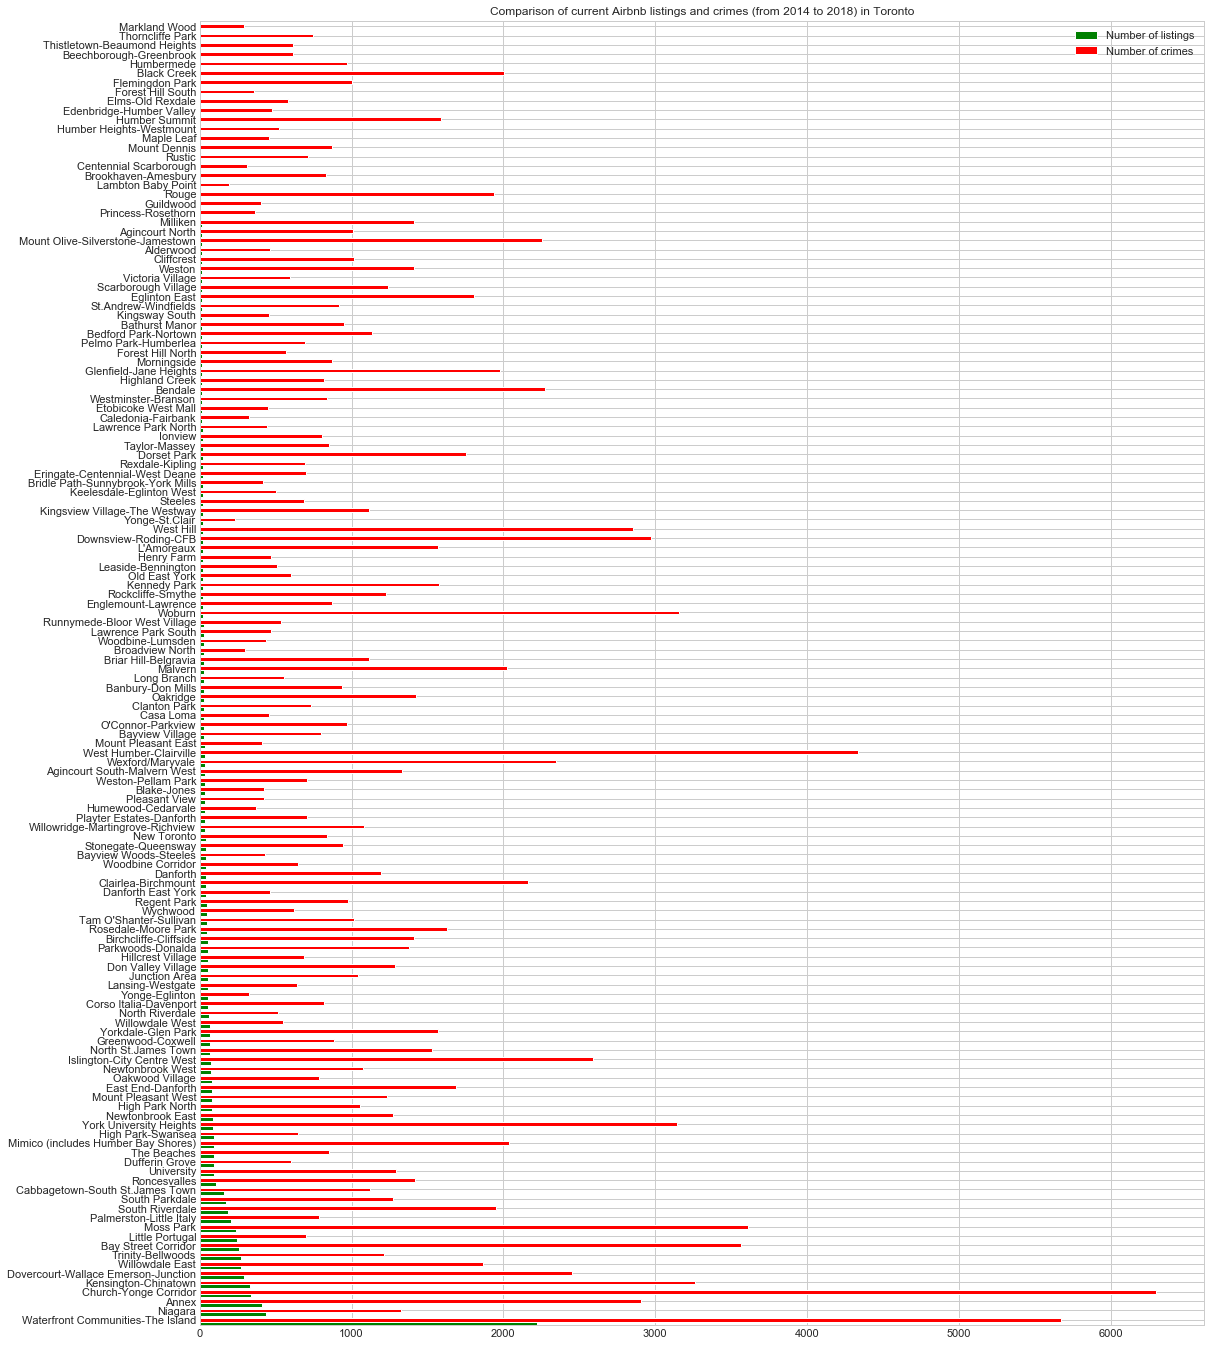

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_bar = pd.DataFrame(dict(graph=df_listings_and_crime.index,
                           n=df_listings_and_crime['Number of listings'], m=df_listings_and_crime['Number of crimes'])) 

ind = np.arange(len(df_bar))
width = 0.4

f, ax = plt.subplots(figsize=(18,24))
plt.title('Comparison of current Airbnb listings and crimes (from 2014 to 2018) in Toronto')
ax.barh(ind, df_bar.n, width, color='green', label='Number of listings')
ax.barh(ind + width, df_bar.m, width, color='red', label='Number of crimes')

ax.set(yticks=ind + width, yticklabels=df_bar.graph, ylim=[2*width - 1, len(df_bar)])
ax.legend()

plt.show()

<h3 style="color:blue;">Analysis of reviews</h3>

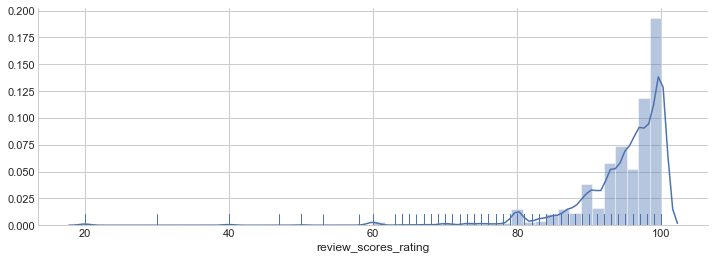

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.distplot(df_listings['review_scores_rating'], rug=True)
sns.despine()
plt.show();

In [41]:
df_listings['review_scores_rating'].describe()

count    10171.000000
mean        94.494052
std          7.503971
min         20.000000
25%         93.000000
50%         96.000000
75%         99.000000
max        100.000000
Name: review_scores_rating, dtype: float64

<h4 style="color:green;">On average, most reviews are high.</h4>

In [82]:
# Reading Review file for analysis

reviews =  pd.read_csv('reviews.csv')
reviews['comments'] = reviews['comments'].str.replace("[{}]", "").str.replace('"', "").str.replace('\n','')
review = reviews['comments'].str.lower()


In [87]:
KWs = ('posting','well','us','','also','host','get')
for KW in KWs:
    stopword.append(KW)

In [84]:
data = []
wordcount = {}
#Top50KWs = {}
for comment in review:
    
    for word in (str(comment).split()):
        word = clean_string(word)
        if word not in stopword:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
            #if not word in stopword: 
            #filterdata.append(word)
            #data.append(val)
#data
word_counter = Counter(wordcount)
for word, count in word_counter.most_common(200):
    #Top50KWs.update({count:word})
    data.append(word)

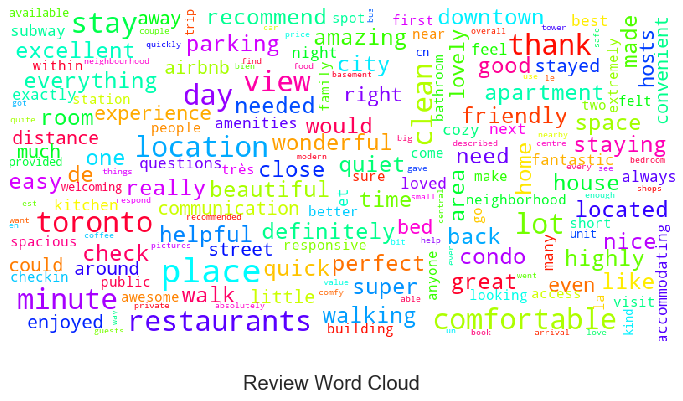

In [100]:
show_wordcloud((' '.join(map(str, data))),stopword,title='Review Word Cloud')

<h3 style="color:blue;">Analysis of prices</h3>

In [42]:
#Pricing Guideline
df = df0.groupby(['bedrooms','city'])['price'].agg(['count', 'max', 'mean', 'median', 'min', 'std']).sort_values(by=['bedrooms','count','city'], ascending = [True, False, False])
df = df.astype({'max':'int64', 'min':'int64', 'median':'int64','mean':'int64'}) 
df

count   max  mean  median   min         std
bedrooms city                                                    
0.0      Toronto        727   999   115      95     0  102.570932
         North York       1    70    70      70    70         NaN
1.0      Toronto       6340  9999   107      89     0  164.720495
         Scarborough     14    99    40      33    30   18.673010
         North York       4   199    96      74    40   72.715771
         York             3    55    48      50    40    7.637626
         Vaughan          3    38    37      38    35    1.732051
         Etobicoke        2    46    44      44    42    2.828427
         Ontario          1    85    85      85    85         NaN
2.0      Toronto       2118  9999   194     158    13  243.976567
         North York       5   265   153     119    84   76.814712
         Etobicoke        3   254   163     158    78   88.121129
         Scarborough      1   129   129     129   129         NaN
3.0      Toronto        657  3000   289     240    30  216.147229
         Scarborough      2   129   124     124   119    7.071068
4.0      Toronto        184  4000   355     290    13  334.443604
5.0      Toronto         60  2468   517     449    95  362.708665
         Vaughan          1    39    39      39    39         NaN
6.0      Toronto         29  1000   532     525    52  239.279965
         Vaughan          1    55    55      55    55         NaN
7.0      Toronto          4   800   501     563    78  307.520189
8.0      Toronto          4  1000   580     625    70  396.501681
9.0      Toronto          2   390   299     299   208  128.693434
10.0     Toronto          1   200   200     200   200         NaN
13.0     Toronto          3   999   886     999   660  195.721741
15.0     Toronto          1  1000  1000    1000  1000         NaN

In [43]:
df_listings['price'].describe()

count    10171.000000
mean       146.837184
std        203.225357
min          0.000000
25%         70.000000
50%        110.000000
75%        170.000000
max       9999.000000
Name: price, dtype: float64

<h4 style="color:green;">On average, the price to rent Airbnb in Toronto is $146.00.</h4>

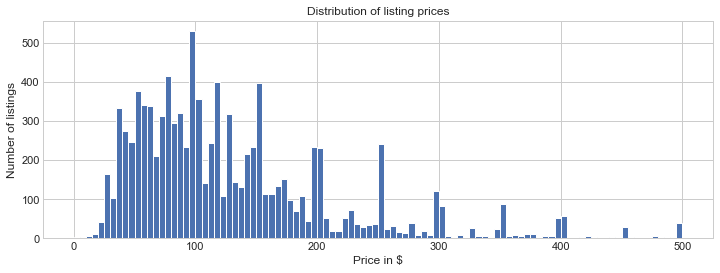

In [44]:
plt.figure(figsize=(12,4))
df_listings.loc[(df_listings['price'] <= 500) ]['price'].hist(bins=100)
plt.ylabel('Number of listings')
plt.xlabel('Price in $')
plt.title('Distribution of listing prices');

<h4 style="color:green;">Most of the Airbnb rental prices are between 0 to $200</h4>

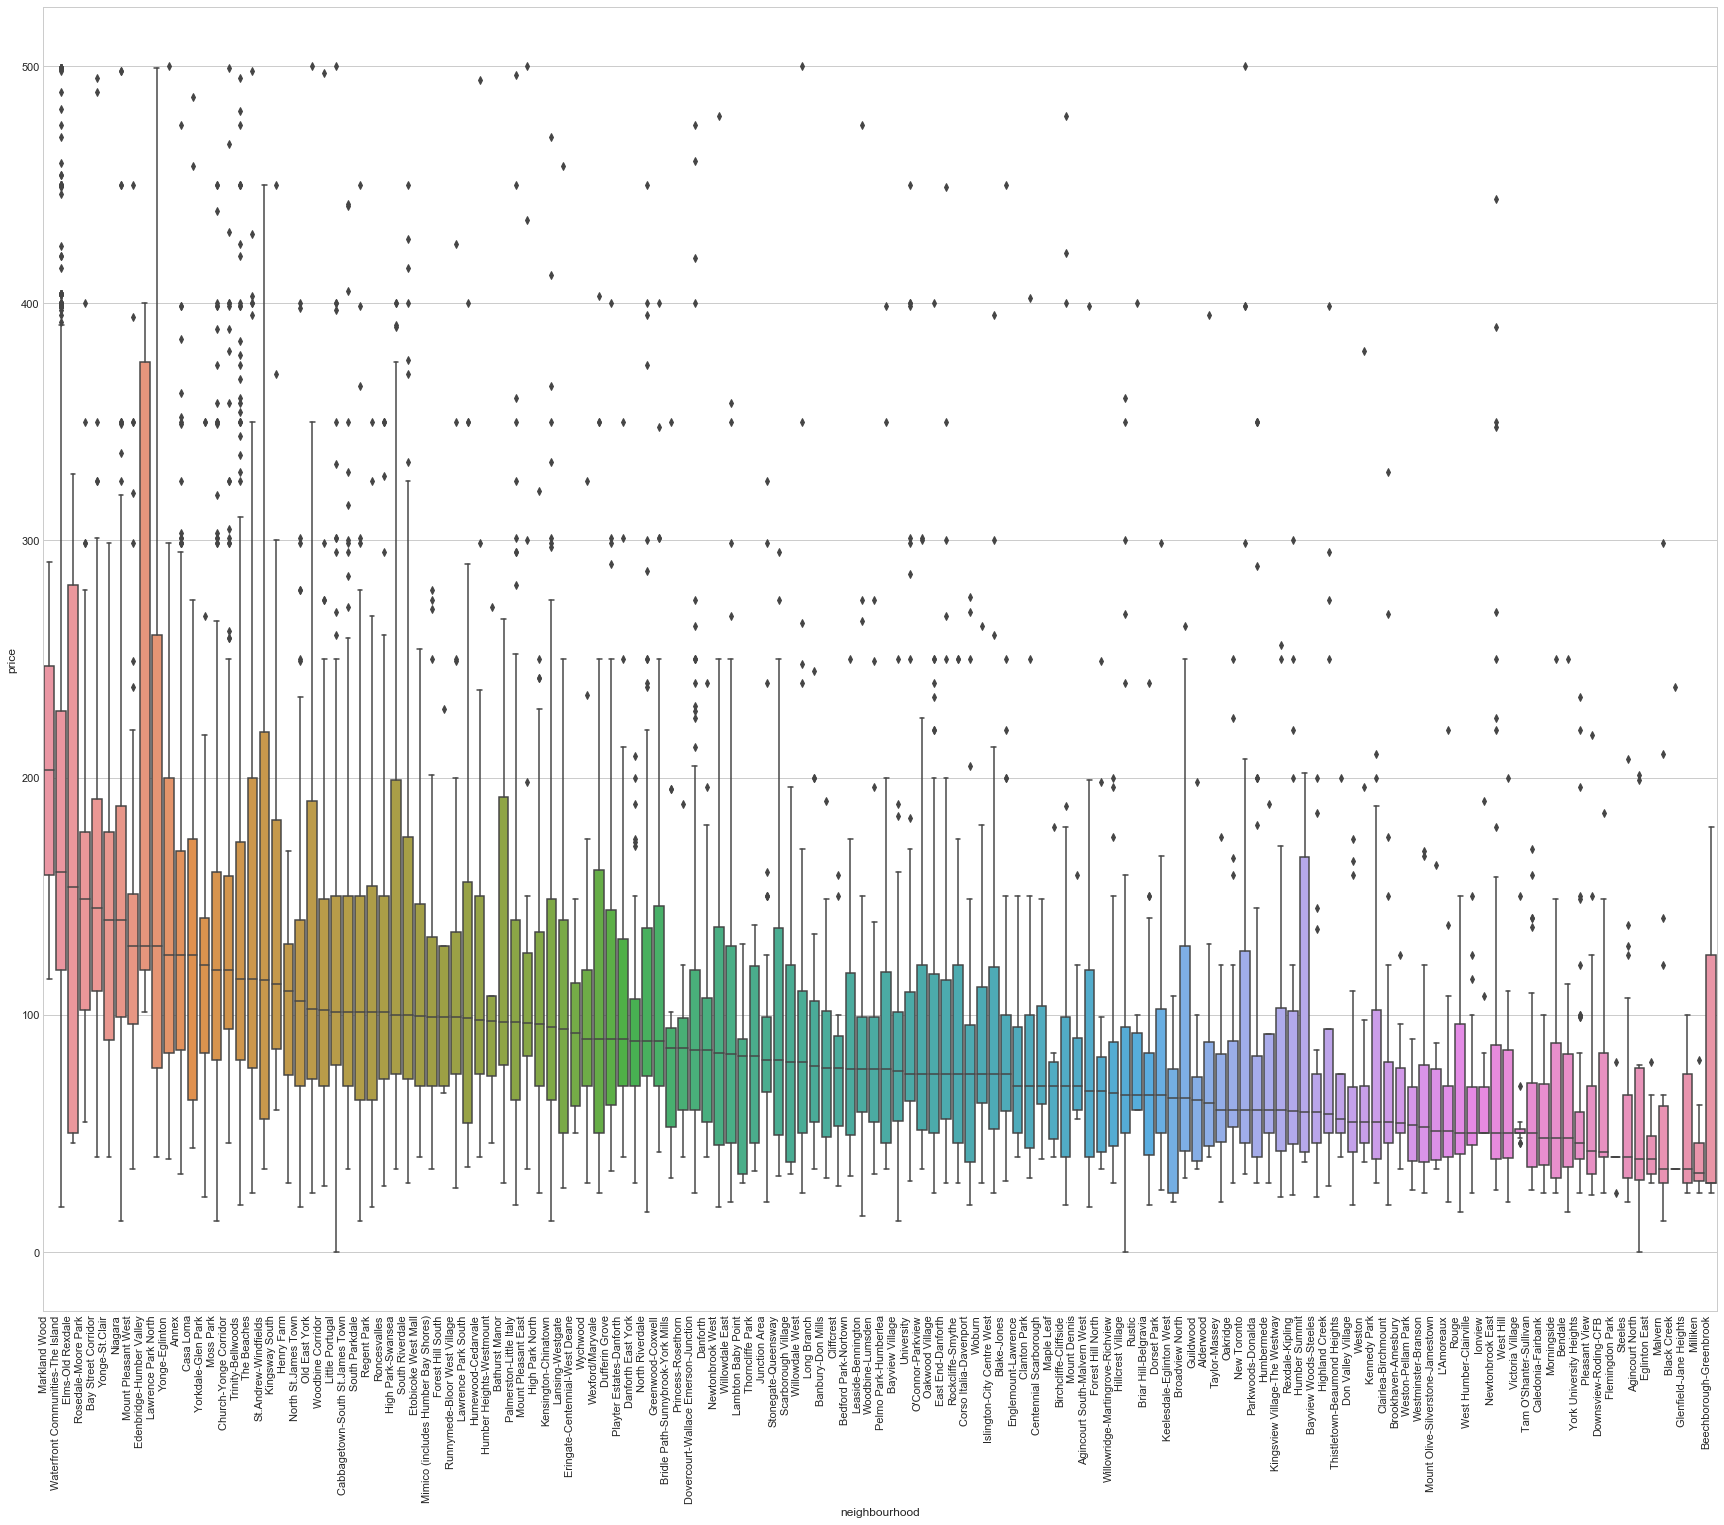

In [45]:
#Neighbourhood vs price
plt.figure(figsize=(30,24))
sort_price = df_listings.loc[(df_listings['price'] <= 500)].groupby('neighbourhood')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='neighbourhood', data=df_listings.loc[(df_listings['price'] <= 500) ], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

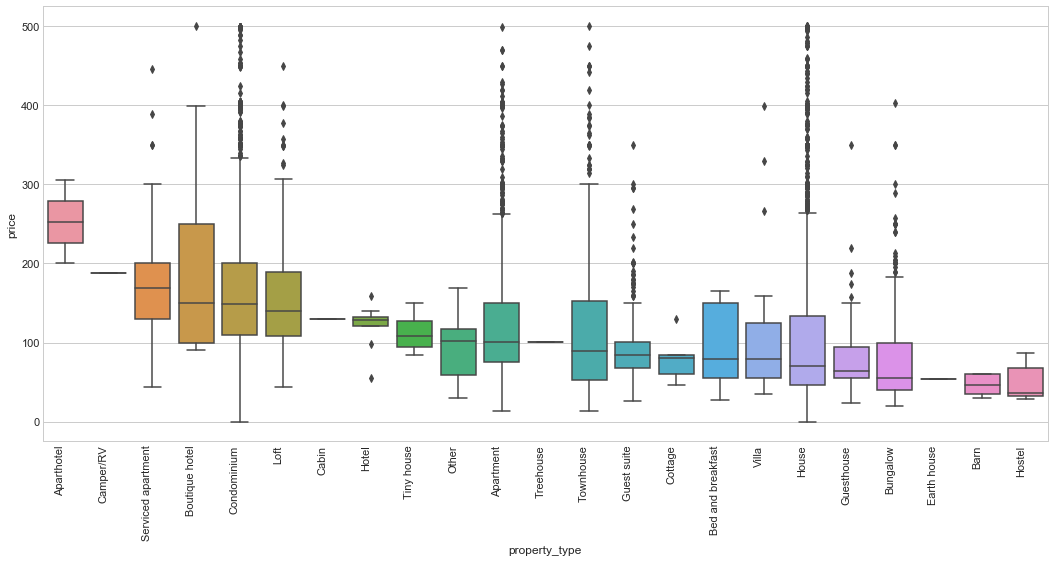

In [46]:
#Property type vs price
plt.figure(figsize=(18,8))
sort_price = df_listings.loc[(df_listings['price'] <= 500)].groupby('property_type')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='property_type', data=df_listings.loc[(df_listings['price'] <= 500) ], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

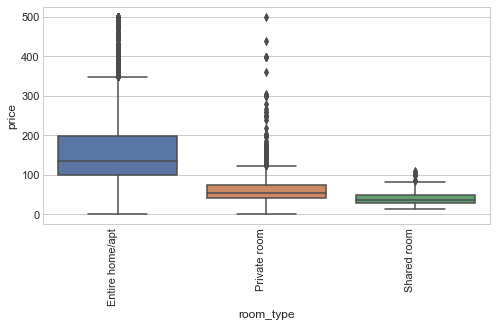

In [47]:
#Room_type vs price
plt.figure(figsize=(8,4))
sort_price = df_listings.loc[(df_listings['price'] <= 500)].groupby('room_type')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='room_type', data=df_listings.loc[(df_listings['price'] <= 500) ], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

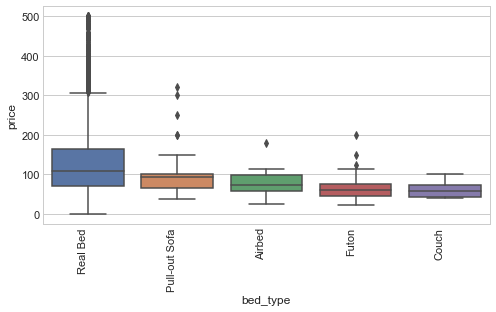

In [48]:
#bed_type vs price
plt.figure(figsize=(8,4))
sort_price = df_listings.loc[(df_listings['price'] <= 500)].groupby('bed_type')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='bed_type', data=df_listings.loc[(df_listings['price'] <= 500) ], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

In [62]:
#Amenities


df_listings['amenities'] = df_listings['amenities'].str.replace("[{}]", "").str.replace('"', "")
df_listings['amenities'].head()




3     internet,wifi,air conditioning,kitchen,free pa...
4     tv,cable tv,internet,wifi,air conditioning,whe...
7     tv,cable tv,wifi,air conditioning,kitchen,free...
9     tv,internet,wifi,air conditioning,kitchen,free...
10    tv,cable tv,internet,wifi,air conditioning,kit...
Name: amenities, dtype: object

In [69]:
df_listings['amenities'] = df_listings['amenities'].str.lower()
data = []
for value in df_listings['amenities']:
    for val in value.strip().split(','):
        data.append(val)

        
wordcount = {}
Top20Ameneties = {}
for word in data:
    word = word.replace(".","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    word = word.replace("\n","")
    word = word.replace("\t","")
    if word not in stopword:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1# Print most common word
#n_print = int(input("How many most common words to print: "))
#print("\nOK. The {} most common words are as follows".format(n_print))
word_counter = Counter(wordcount)
for word, count in word_counter.most_common(20):
    Top20Ameneties.update({count:word})
    
    
Top20Ameneties

{10121: 'wifi',
 10044: 'heating',
 10014: 'essentials',
 9843: 'smoke detector',
 9541: 'kitchen',
 9533: 'hangers',
 9052: 'shampoo',
 9011: 'air conditioning',
 8912: 'carbon monoxide detector',
 8707: 'hair dryer',
 8533: 'laptop friendly workspace',
 8422: 'washer',
 8371: 'iron',
 8317: 'dryer',
 7691: 'tv',
 7404: 'hot water',
 6089: 'refrigerator',
 5810: 'fire extinguisher',
 5738: 'dishes and silverware',
 5655: 'microwave'}

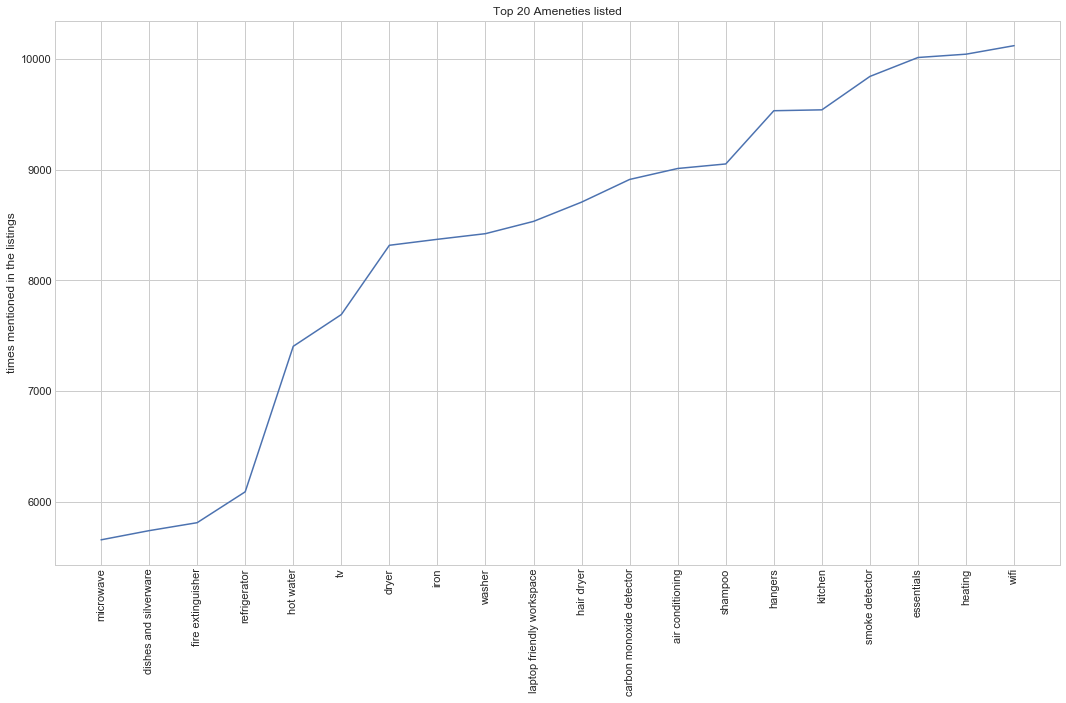

In [78]:
#Top 20 Ameneties plotted
Ameneties = sorted(Top20Ameneties.items())
plt.figure(figsize=(18,10))
y, x = zip(*Ameneties)
plt.plot(x,y)
plt.title('Top 20 Ameneties listed')
plt.ylabel('times mentioned in the listings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xticks(rotation=90)
plt.show();

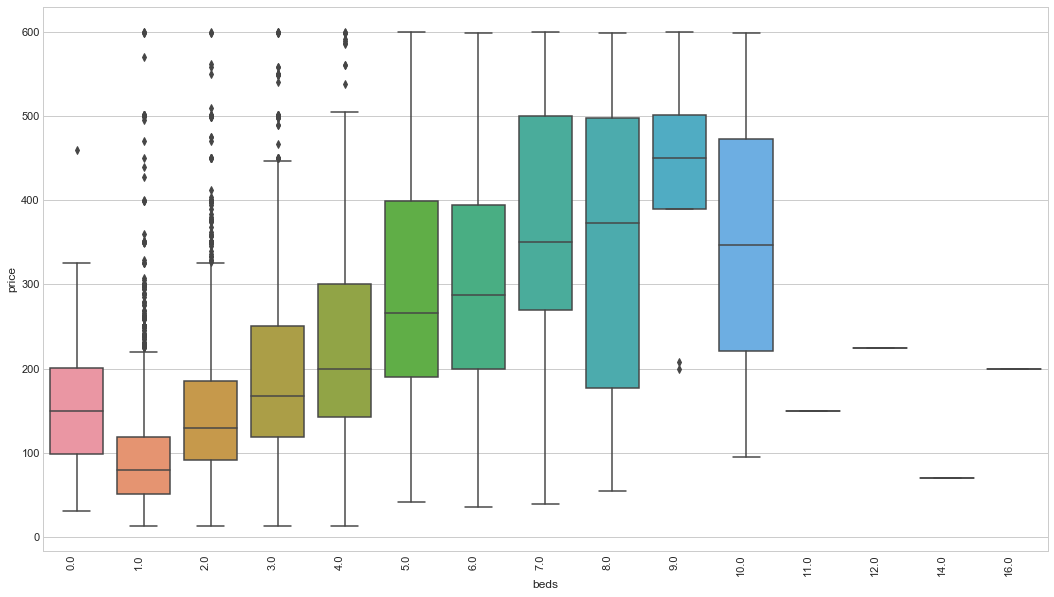

In [47]:
#number of beds vs price
plt.figure(figsize=(18,10))
sns.boxplot(y='price', x='beds', data = df_listings.loc[(df_listings.price <= 600) & (df_listings.price > 0)])

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show();

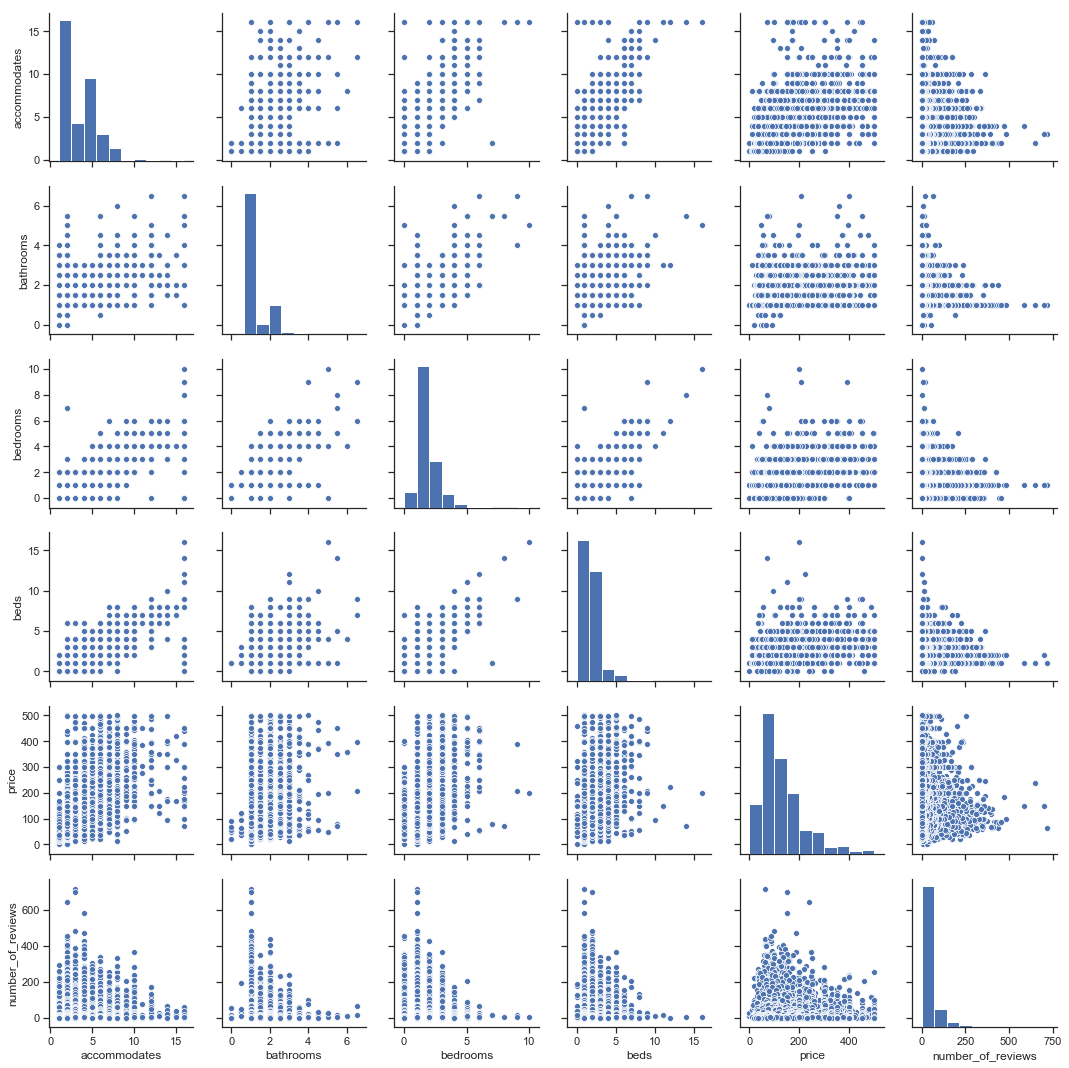

In [48]:
#Determine correlation between various columns

col = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews']
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_listings.loc[(df_listings.price <= 500)][col].dropna())
plt.show();

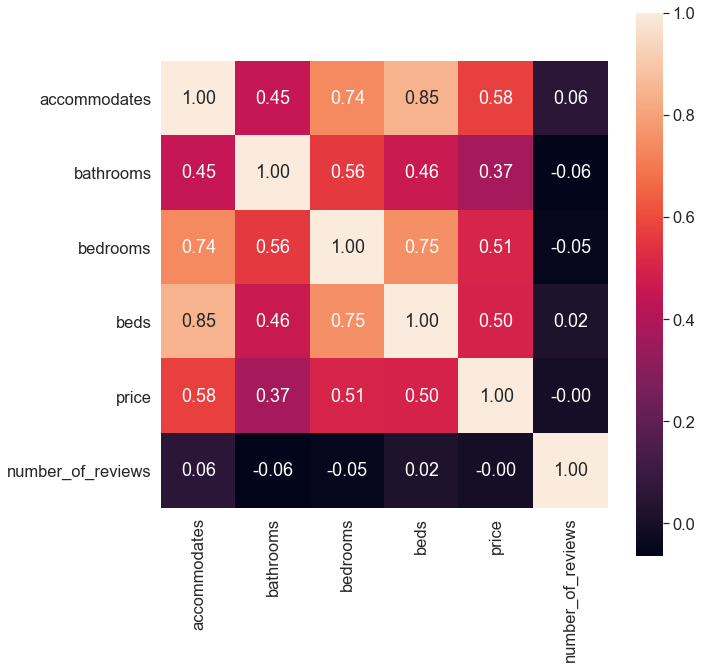

In [49]:
#Determine correlation between various columns using Heat Map
col = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews']
corr = df_listings.loc[(df_listings.price <= 500)][col].dropna().corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();



# MODEL AND TRAIN

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
#prepare data, categorize the amenities

df_listings.amenities = df_listings.amenities.str.replace("[{}]", "").str.replace('"', "")
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(df_listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

In [51]:
#prepare data, for all the t/f categories below, convert t to 1 and f to 0 (t = true, f = false)
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    df_listings[c] = df_listings[c].replace('f',0,regex=True)
    df_listings[c] = df_listings[c].replace('t',1,regex=True)

In [52]:
#separate the numeric from non-numeric data
df_listings_numeric = df_listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]

In [53]:
#Fill the missing values with median.
for col in df_listings_numeric.columns[df_listings_numeric.isnull().any()]:
    df_listings_numeric[col] = df_listings_numeric[col].fillna(df_listings_numeric[col].median())

In [54]:
#check if there are any more NaN
info(df_listings_numeric)



Rows: 10171 Columns: 19


,Column,NaN Count,Nan%,Unique
1,host_is_superhost,0,0%,2
11,host_listings_count,0,0%,50
18,review_scores_rating,0,0%,46
17,number_of_reviews,0,0%,324
16,guests_included,0,0%,16
15,bedrooms,0,0%,13
14,bathrooms,0,0%,15
13,minimum_nights,0,0%,59
12,host_total_listings_count,0,0%,50
10,cleaning_fee,0,0%,196


In [55]:
#add non_numeric data into a separate column
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood', 'bed_type']:
    df_listings_numeric = pd.concat([df_listings_numeric, pd.get_dummies(df_listings[cat_feature])], axis=1)

In [56]:
#Concat with ammenities
df_listings_numeric = pd.concat([df_listings_numeric, df_amenities], axis=1, join='inner')

<h3 style="color:blue;">Predict using Logistic Regression</h3>

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [58]:
df_clean = df_listings_numeric

In [59]:
df_clean = df_listings_numeric
X = df_clean.drop(columns=['price'])
y = df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

In [60]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.06405990016638935


<h3 style="color:blue;">Predict using kNN</h3>

In [62]:
#Function to run kNN predictor
def run_knn_predictor (n_neighbors_num, df_clean, testSize, randomState):
    X = df_clean.drop(columns=['price'])
    y = df_clean['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=testSize, random_state=randomState)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors_num) # initialize knn classifier

    knn.fit(X_train, y_train) # fit the model to training set in order to predict classes

    y_pred = knn.predict(X_test) # create a prediction array for our test set
    iris_model_df = pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], 
          ignore_index=False, axis=1)
    print (n_neighbors_num," ",accuracy_score(iris_model_df['price'], iris_model_df['Predicted']))

In [63]:
for number in range(1, 200, 10):
    if (number>0):
        run_knn_predictor(number,df_listings_numeric,0.30,0)

1   0.054785020804438284
11   0.05131761442441054
21   0.05339805825242718
31   0.059639389736477116
41   0.052011095700416086
51   0.049930651872399444
61   0.060332871012482664
71   0.049930651872399444
81   0.04576976421636616
91   0.03952843273231623
101   0.04022191400832178
111   0.038834951456310676
121   0.03952843273231623
131   0.04230235783633842
141   0.04022191400832178
151   0.04230235783633842
161   0.04022191400832178
171   0.04230235783633842
181   0.0478502080443828
191   0.04576976421636616


Best accuracy is 0.060332871012482664 when nearest Neighbour = 61

<h4 style="color:green;">Prediction of price is very difficulty as we were only able to achive about 6% using two different models (Logistic Regression and kNN).  More work or different strategy is needed to train and test our model.</h4>

<h3 style="color:red;">Analysis on Host and Super Host</h3>




Are the number of hosts increasing Year over Year?


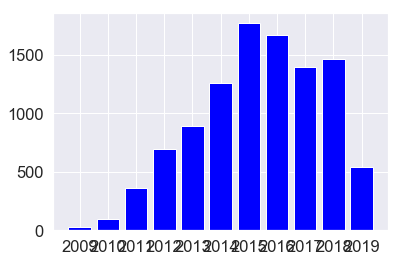

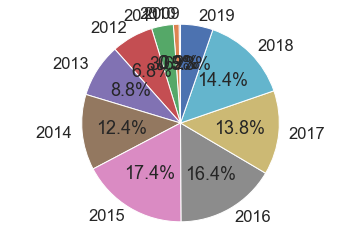

,host_since,% of Total
2009,24,0%
2010,95,1%
2011,362,4%
2012,696,7%
2013,891,9%
2014,1258,12%
2015,1770,17%
2016,1670,16%
2017,1400,14%
2018,1465,14%


It seems that the growth has flattened out in the past few years



How does the reponse time look like?


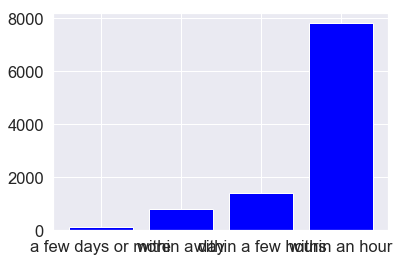

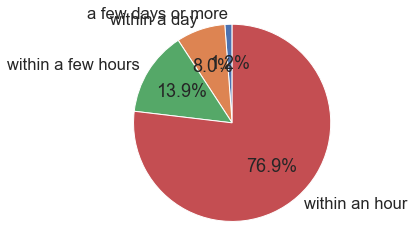

,host_response_time,% of Total
a few days or more,121,1%
within a day,816,8%
within a few hours,1415,14%
within an hour,7819,77%


Hosts are very responsive!



How experienced are the hosts? Are they mostly super hosts?


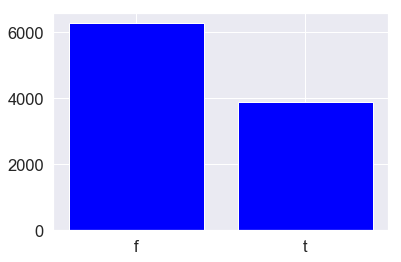

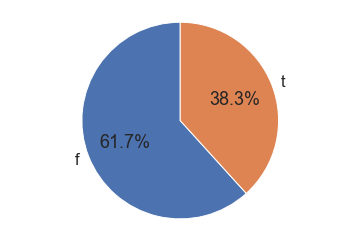

,host_is_superhost,% of Total
f,6278,62%
t,3893,38%


More than one third of the hosts are super hosts which is a lot!


In [64]:
#If you put any question/answer it will automatically analyze it
QuestionAnswer = {
 'host_since': ['Are the number of hosts increasing Year over Year?','It seems that the growth has flattened out in the past few years'],
 'host_response_time': ['How does the reponse time look like?','Hosts are very responsive!'],
 'host_is_superhost': ['How experienced are the hosts? Are they mostly super hosts?','More than one third of the hosts are super hosts which is a lot!'],
}
for col in list(QuestionAnswer.keys()):
    q = QuestionAnswer[col][0]
    a = QuestionAnswer[col][1]
    if a or q: analyze(df, col, QuestionAnswer[col])

<h3 style="color:blue;">Are super hosts more responsive than regular hosts?</h3>

In [65]:
super_hosts(df0,'host_response_rate','min')

In 83% of the categories, super hosts min host_response_rate is more than regular hosts.


,bedrooms,city,regular,super,all
5,1.0,Scarborough,0.83,0.89,0.83
9,2.0,Etobicoke,1.00,1.00,1.00
10,2.0,North York,0.98,1.00,0.98
15,4.0,Toronto,0.43,0.82,0.43
16,5.0,Toronto,0.58,0.90,0.58
18,6.0,Toronto,0.67,1.00,0.67


<h3 style="color:blue;">Are super hosts more expensive than regular hosts?</h3>

In [66]:
super_hosts(df0,'price','median')

In 77% of the categories, super hosts median price is more than regular hosts.


,bedrooms,city,regular,super,all
1,0.0,Toronto,91.0,99.0,95.0
3,1.0,North York,119.5,74.0,74.0
5,1.0,Scarborough,32.0,40.0,33.5
6,1.0,Toronto,87.0,95.0,89.0
9,2.0,Etobicoke,78.0,206.0,158.0
10,2.0,North York,119.0,181.5,119.0
12,2.0,Toronto,150.0,165.0,158.0
14,3.0,Toronto,230.0,241.5,240.0
15,4.0,Toronto,268.0,350.0,290.0
16,5.0,Toronto,450.0,365.0,449.5


<h3 style="color:red;">Heat map for Airbnb listings</h3>

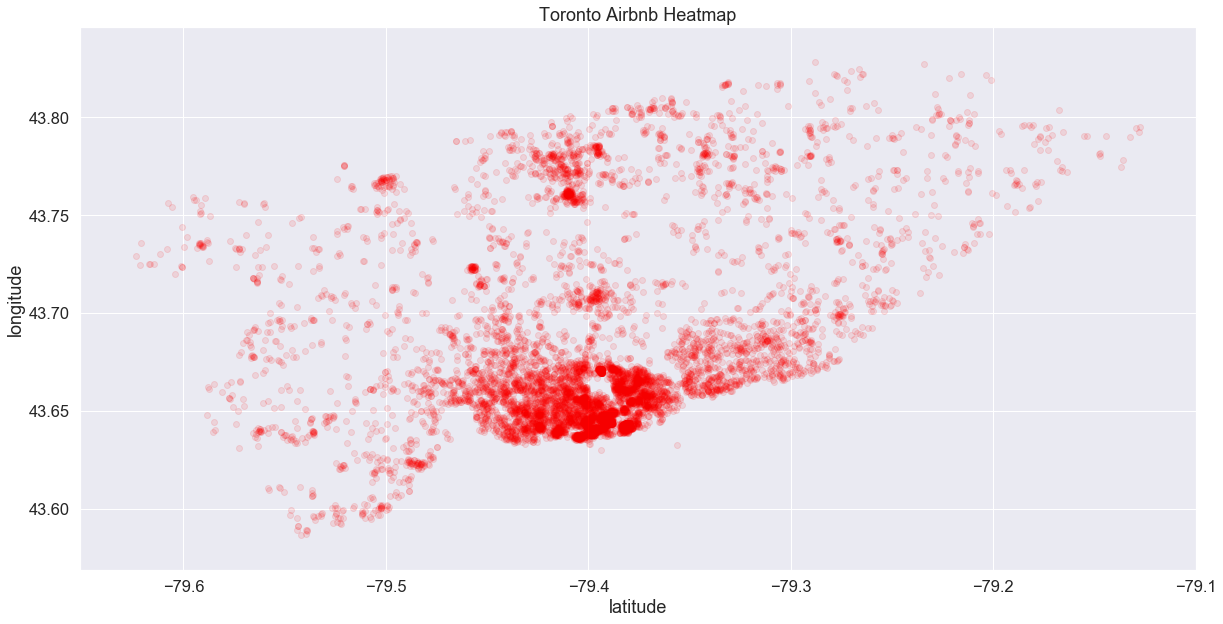

In [67]:
plt.figure(figsize=(20,10))
plt.scatter(df0['longitude'], df0['latitude'], c='red', alpha=0.1)
plt.ylabel('longitude', fontsize=18)
plt.xlabel('latitude', fontsize=18)
plt.title('Toronto Airbnb Heatmap', fontsize=18)
plt.show()

# TimeSeries Analysis

In [3]:
calendar = pd.read_csv('calendar.csv')
calendar = calendar.append(pd.read_csv('calendar 2018-19.csv'),sort=True)


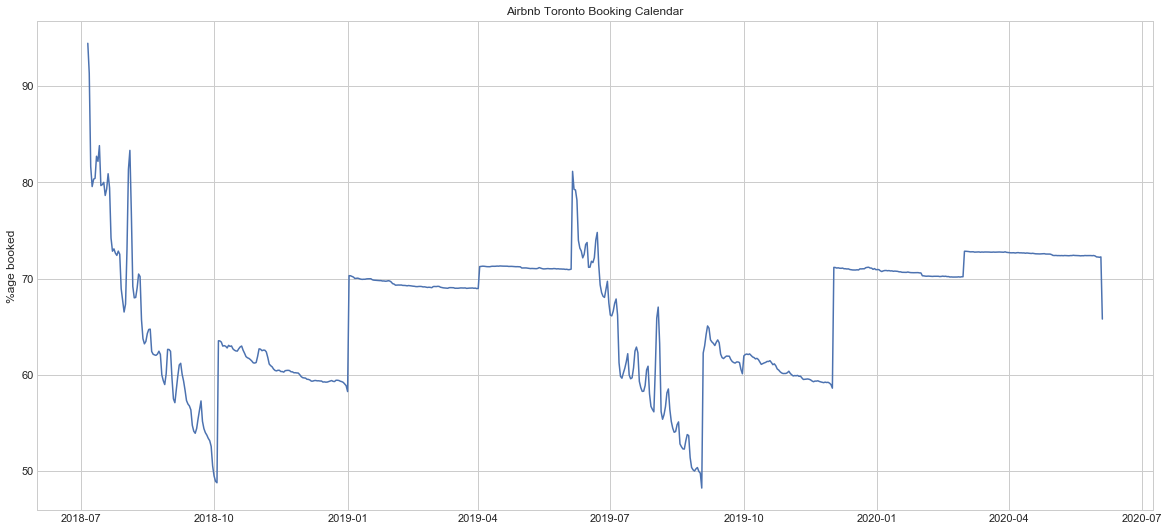

In [4]:
calendarTS = calendar.loc[:,['date', 'available']]
calendarTS['booked'] = calendarTS.available.map( lambda x: 0 if x == 't' else 1)
calendarTS = calendarTS.groupby('date')['booked'].sum().reset_index()
cal_temp = calendar[['date','available']]
cal_temp = cal_temp.groupby('date').count().reset_index()

calendarTS['date'] = pd.to_datetime(calendarTS['date'])
calendarTS['%age booked'] = (calendarTS['booked']/cal_temp['available'])*100

calendarTS.index = pd.to_datetime(calendarTS.date)

plt.figure(figsize=(20, 9))
plt.plot(calendarTS['%age booked'])
plt.title('Airbnb Toronto Booking Calendar')
plt.ylabel('%age booked')
plt.show();

### More than half of All the Airbnb listings are always booked!

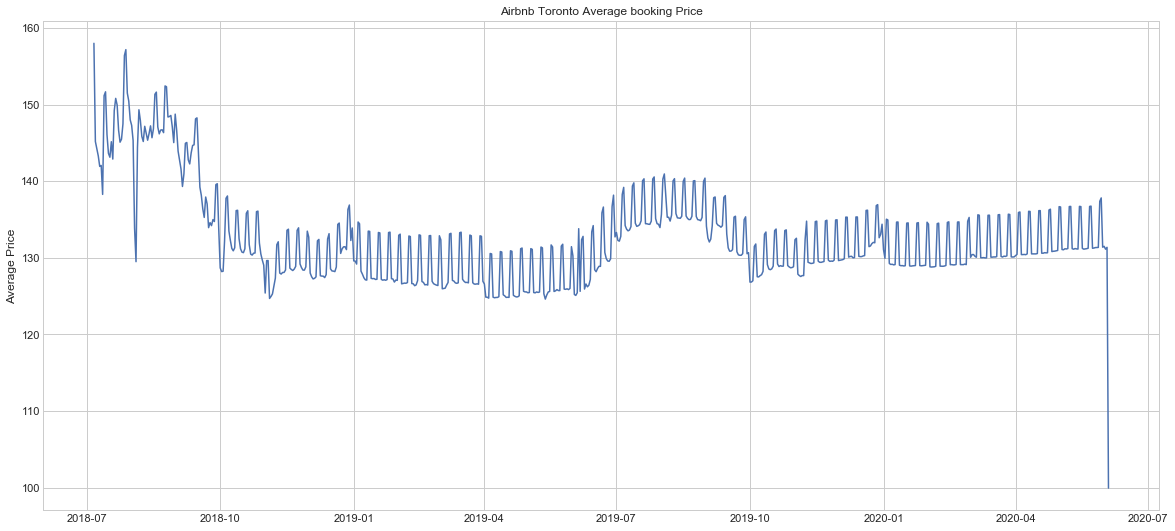

In [6]:
calendarTSA = calendar.loc[:,['date', 'available','price']]
calendarTSA.dropna(inplace = True)
calendarTSA['booked'] = calendarTSA.available.map( lambda x: 0 if x == 't' else 1)
calendarTSA['price'] = calendarTSA['price'].apply(lambda x: x.replace('$','').replace(',',''))
calendarTSA.drop(columns = 'available',inplace=True)
calendarTSA = calendarTSA.astype({'price':'float'})
calendarTSA = calendarTSA.loc[calendarTSA['price']< 500]
calendarTSA.index = pd.to_datetime(calendarTSA.date)
calendarTSA.drop(columns='date',inplace=True)
calendarTSA_AvgPrice = calendarTSA.groupby(['date'])['price'].mean().reset_index()
calendarTSA_AvgPrice.index = pd.to_datetime(calendarTSA_AvgPrice.date)
#calendar_booking.info()

plt.figure(figsize=(20, 9))
plt.plot(calendarTSA_AvgPrice['price'])

plt.title('Airbnb Toronto Average booking Price')
plt.ylabel('Average Price')

plt.show();

<h1>*** End of project ***</h1>